# **Computer Vision**

Notebook created by Ganesh_9124, CSE with major in AI, IIITDM Kancheepuram



## **0. What we're going to cover**

* Getting vision dataset to work with using `torchvision.datasets`.
* Architecture of a convolutional neural network with PyTorch.
* An end-to-end multiclass image classification problem.
* Steps in modelling CNNs in PyTorch.
  * Creating a CNN model
  * Picking a loss function and optimizer.
  * Training the model.
  * Testing the model.

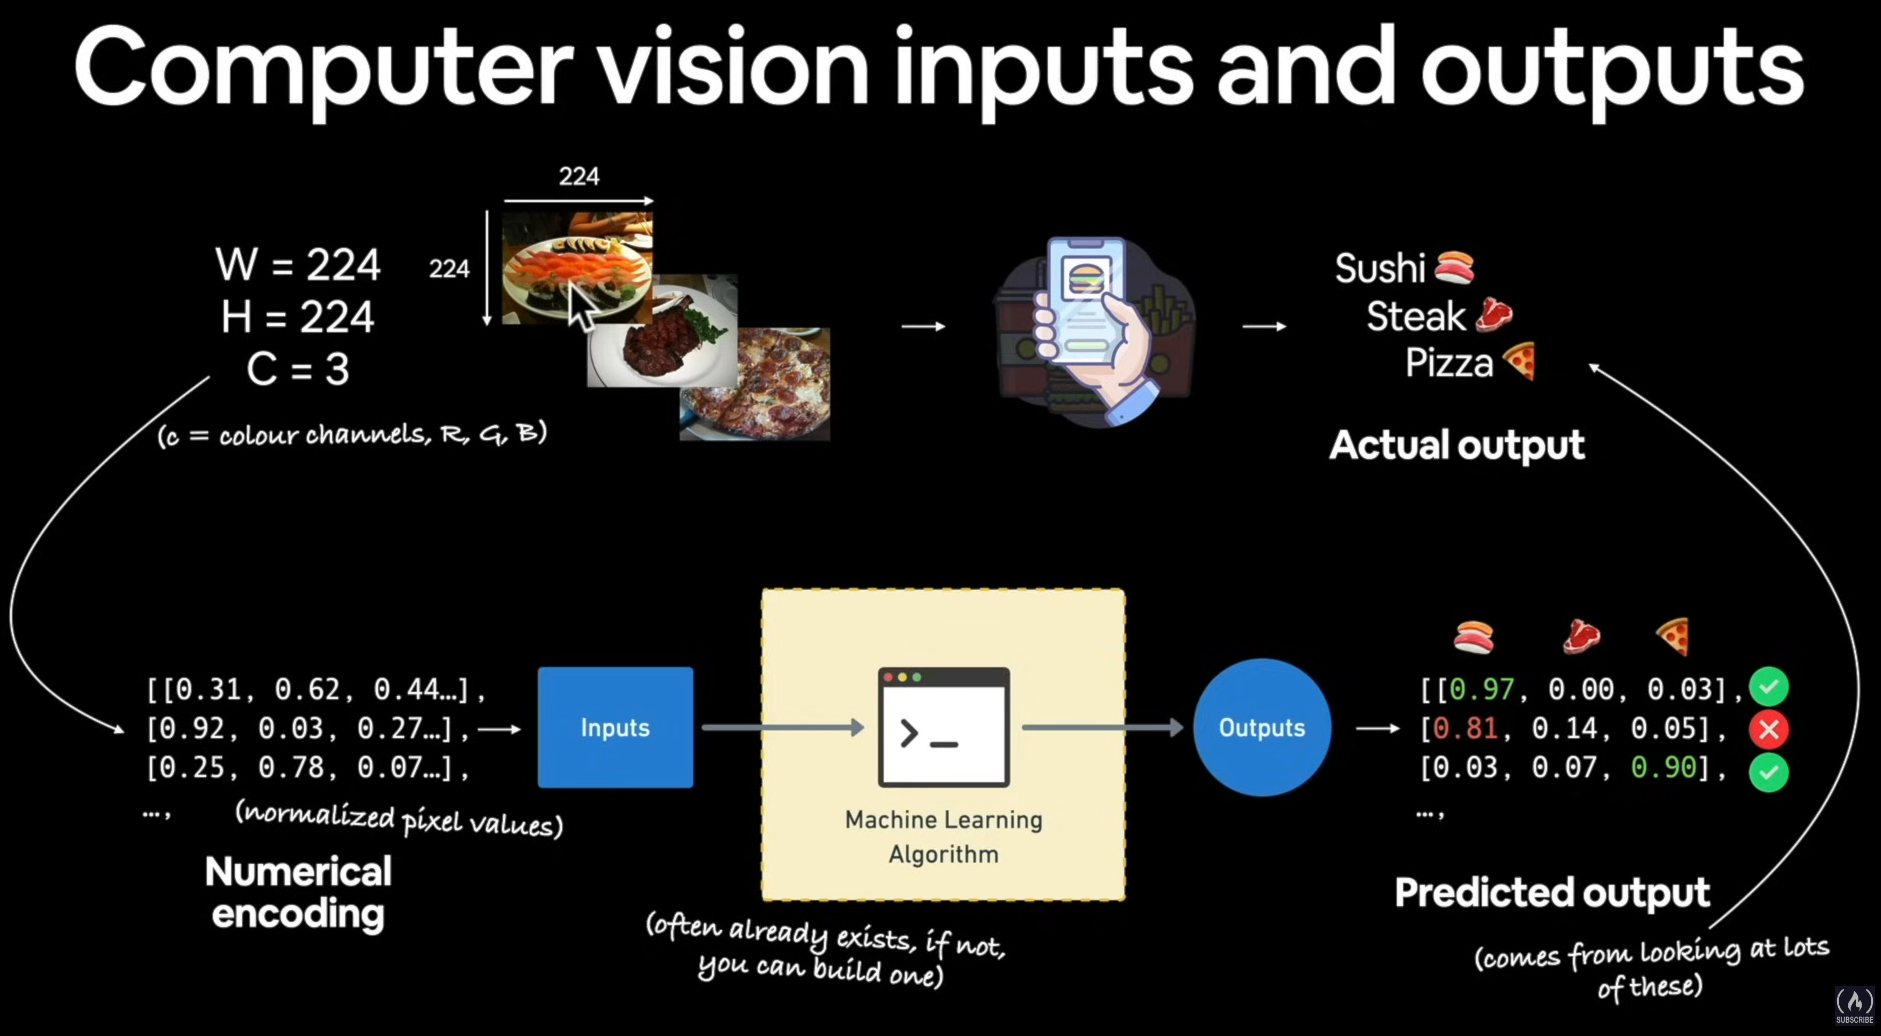

#### Input and Output shapes

input : [batch_size, width, height, color_channels]
or [batch_size, color_channels, width, height]
            ex. shape = [None, 224, 224, 3]
                    [32, 224, 224, 3]

output : tensor of prediction probabilities.
        ex. shape = [1000]
        here, 1000 is number class labels in dataset.

## **1. Torchvision**

The `torchvision` package consists of popular datasets, model architectures, and common image transformations for computer vision.

for more info visit: https://pytorch.org/vision/stable/index.html


* `torchvision.datasets` - get datasets and data loading functions for Computer Vision tasks.
* `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems.
* `torchvision.transforms` - functions for manipulating your vision data (images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - Base dataset class for PyTorch.
* `torch.utils.data.DataLoader` - Creates a Python iterable over dataset.

In [1]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import matplotlib for visualization
import matplotlib.pyplot as plt

# check versions
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cu121
0.18.0+cu121


## **2. Getting a dataset**

Dataset : FashionMNIST
          it is large freely available dataset of fashion images that is commonly used for training and testing various machine learning models.
* It consists of 70000 28x28 grayscale images of fashion products from 10 categories.
* for more info: https://en.wikipedia.org/wiki/Fashion_MNIST

FashionMNIST using `torchvision.dataset` module:
https://pytorch.org/vision/0.18/generated/torchvision.datasets.FashionMNIST.html


return type of `torchvision.dataset` method:
* tuple.
* (image, index).
* index is int dtype.

In [2]:
# Setup training data

train_data = datasets.FashionMNIST(
    root = "data", # where to download data
    train = True, # do we want training dataset
    download = True, # do we want to download it?
    transform = ToTensor(), # how do we want to transform the data.
    target_transform = None # how do we want to transform the labels/target
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),   # ToTensor - converts a PIL image, ndarray to tensor of shape [color_channels, width, height]
    target_transform = None
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10813114.81it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 168178.32it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3115025.94it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9695678.94it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [3]:
len(train_data), len(test_data)

(60000, 10000)

### **2.1 Check input and output shapes of data**

In [4]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [5]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [6]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [7]:
image.shape, image.ndim, label

(torch.Size([1, 28, 28]), 3, 9)

In [8]:
image[0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510, 0.2863, 0.0000,
         0.0000, 0.0039, 0.0157, 0.0000, 0.0000, 0.0000

### **2.2 Visualization of data**

Image shape: torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

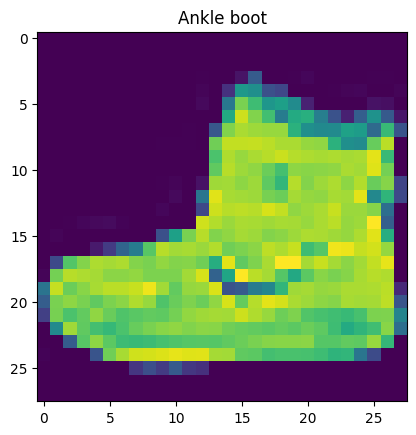

In [9]:
image, label = train_data[0]

print(f"Image shape: {image.shape}")

plt.imshow(image.squeeze())
plt.title(class_names[label])
plt.axis()

(-0.5, 27.5, 27.5, -0.5)

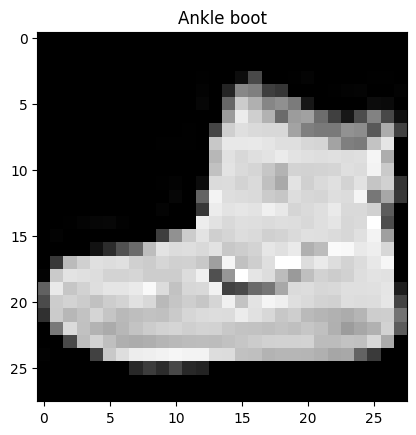

In [10]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_names[label])
plt.axis()

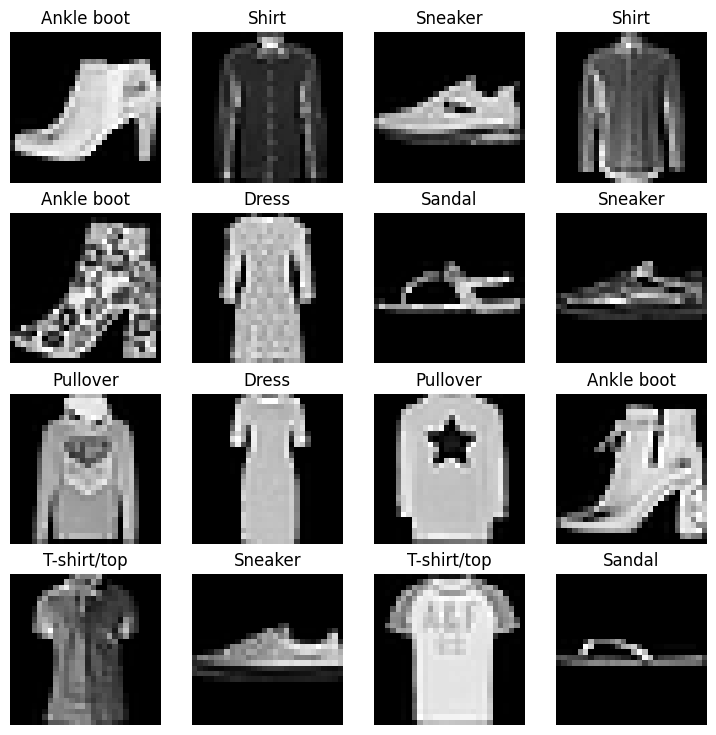

In [11]:
# plot some more images

# torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, columns = 4, 4

for i in range(1, rows * columns + 1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, columns, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## **3. Prepare DataLoader**

Data is in form of PyTorch Datasets.
DataLoader turns our dataset into a Python iterable i.e we can loop through it.
we want to turn data into mini-batches.
  
why?:

* It is more computationally efficient.
* It gives our network more chances to update its gradients per epoch.

for more info:
  https://www.youtube.com/watch?v=4qJaSmvhxi8

In [12]:
# Turn train data in DataLoader

from torch.utils.data import DataLoader

# setup batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True
)

test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    shuffle = False
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cf001e2b610>,
 <torch.utils.data.dataloader.DataLoader at 0x7cf001e28760>)

#### **next(iter(dataloader))**

iter() calls the `__iter__()` method on dataloader which returns the iterator object.
next() calls the `__next__()` method on the iterator object to get the first iteration. Running `next()` again will get the second item of the iterator.

In [13]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


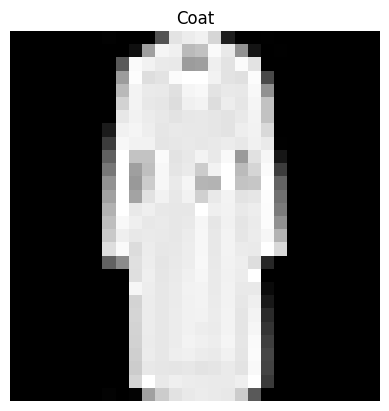

In [14]:
# visualise a sample

torch.manual_seed(42)

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()

img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")


## **4. Build the model**

#### **nn.Flatten()**

Flattens the contigous range of dims into a tensor.

ex. tensor with shape [28, 28], flatten to tensor with shape [784] (as both have same number of parameters.)

In [15]:
# model architecture

class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_features,
               output_features,
               hidden_units = 10):

    """
    Arguments:
      input_features: number of input features
      output_features: number of output features
      hidden_units: number of hidden units

    returns:
      tensor of prediction probabilities
    """
    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features,
                  out_features=hidden_units
                  ),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units
                  ),
        # nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_features
                  )
    )

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)



In [16]:
# Instantiate the model

model_0 = FashionMNISTModelV0(
    input_features=28*28,
    output_features=len(class_names),
    hidden_units=10
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [17]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0296, -0.0084,  0.0328,  ...,  0.0093,  0.0135, -0.0188],
                      [-0.0354,  0.0187,  0.0085,  ..., -0.0001,  0.0115, -0.0008],
                      [ 0.0017,  0.0045,  0.0133,  ..., -0.0188,  0.0059,  0.0100],
                      ...,
                      [ 0.0273, -0.0344,  0.0127,  ...,  0.0283, -0.0011, -0.0230],
                      [ 0.0257,  0.0291,  0.0243,  ..., -0.0087,  0.0001,  0.0176],
                      [-0.0147,  0.0053, -0.0194,  ..., -0.0221,  0.0205, -0.0093]])),
             ('layer_stack.1.bias',
              tensor([ 0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,  0.0018,
                       0.0163,  0.0069])),
             ('layer_stack.2.weight',
              tensor([[-0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,  0.2019,
                        0.2847, -0.1495],
                      [ 0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.3130, -0.

In [18]:
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[ 0.4610, -0.3953, -0.0013,  0.2377, -0.0399, -0.3302,  0.1992,  0.0818,
         -0.1059, -0.3474]], grad_fn=<AddmmBackward0>)

## **5. Training the model**

### **5.1 Setup the loss function and optimizer**

In [19]:
# setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.01)

### **5.2 Function to time our experiments**

Using timeit module.

In [20]:
from timeit import default_timer as timer

def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

In [21]:
import requests
from pathlib import Path

# Download helper function from Learn PyTorch repository.

if Path("helper_function.py").is_file():
  print(f"helper_function.py is already exists")

else:
  print(f"Downloading helper_fuctions.py")
  request = requests.get(f"https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

In [22]:
from helper_function import accuracy_fn

### **5.3 Training and testing loop**


* Loop through epochs.
* Loop through training batches, perform training steps, calculate the train loos per batch.
* Loop through testing batches, perform testing steps, calculate the test loss per batch.


In [23]:
# import tqdm for progress data
from tqdm.auto import tqdm

# set the manual seed and start timer
torch.manual_seed(40)
torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  ### training

  train_loss = 0

  # add loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()

    # 1. forward pass
    y_pred = model_0(X)

    # 2. calculate the loss
    loss = loss_fn(y_pred, y)
    train_loss += loss

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. backpropagation
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # print out what happenin'

    if batch % 400 == 0:
      print(f"looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples.")

  # divide total train loss by length of train dataloader

  train_loss /= len(train_dataloader)


  ### testing
  model_0.eval()
  test_loss , test_acc = 0, 0

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:

      # forward pass
      test_pred = model_0(X_test)

      # calculate the loss
      test_loss += loss_fn(test_pred, y_test)

      # calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

    # calculate test loss average per batch

    test_loss /= len(test_dataloader)

    # calculate test acc average per batch

    test_acc /= len(test_dataloader)

  # print out whats happenin'
  print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")

# calculate the train time
train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device)
                                            )

  0%|          | 0/3 [00:00<?, ?it/s]

looked at 0 / 60000 samples.
looked at 12800 / 60000 samples.
looked at 25600 / 60000 samples.
looked at 38400 / 60000 samples.
looked at 51200 / 60000 samples.
Epoch: 0 | Train loss: 0.9677 | Test loss: 0.6654 | Test acc: 76.0483
looked at 0 / 60000 samples.
looked at 12800 / 60000 samples.
looked at 25600 / 60000 samples.
looked at 38400 / 60000 samples.
looked at 51200 / 60000 samples.
Epoch: 1 | Train loss: 0.5879 | Test loss: 0.5645 | Test acc: 80.2117
looked at 0 / 60000 samples.
looked at 12800 / 60000 samples.
looked at 25600 / 60000 samples.
looked at 38400 / 60000 samples.
looked at 51200 / 60000 samples.
Epoch: 2 | Train loss: 0.5208 | Test loss: 0.5289 | Test acc: 81.4696
Train time on cpu: 27.774 seconds


## **6. Make predictions using model_0**



In [24]:
device = "cpu"

In [25]:
torch.manual_seed(42)

def eval_model(model:torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device=device):
  """
  Returns a dictionary coataining the results of a model predicting on data_loader.

  """
  loss, acc = 0,0
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:

      X, y = X.to(device), y.to(device)
      # make predictions
      y_pred = model(X)

      # accumulate the loss and acc values per batch

      loss += loss_fn(y_pred, y)

      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

      # scale loss and acc to find the average loss/acc per batch

    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__,
              "model_loss": loss.item(),
              "model_acc": acc}

# calculate model 0 results and test dataset

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.5289223194122314,
 'model_acc': 81.46964856230032}

## **7. Setup device agnostic code for using GPU.**


In [26]:
device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [27]:
!nvidia-smi


Mon Jul  1 04:26:20 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P8              10W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## **8. Model 1: Building classification model with non-linearities**

In [28]:
# model architecture with non-linearities

class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_features,
               output_features,
               hidden_units = 8):
    """
    Arguments:
      input_features : number of nodes in first layer of network i.e input features.
      output_features : number of nodes in output layer of network i.e number of class labels.
      hidden_units : number of nodes in hidden layer.

    Returns:
      tensor of prediction probabilities of size similar to output features.
    """

    super().__init__()

    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_features,
                  out_features = hidden_units),
        nn.ReLU(),

        nn.Linear(in_features = hidden_units,
                  out_features = hidden_units),
        nn.ReLU(),

        nn.Linear(in_features = hidden_units,
                  out_features = output_features),

    )

  # define forward method
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.layer_stack(x)

In [29]:
# instantiate the model

model_1 = FashionMNISTModelV1(
    input_features = 28*28,
    output_features = len(class_names),
    hidden_units = 16
).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=16, bias=True)
    (2): ReLU()
    (3): Linear(in_features=16, out_features=16, bias=True)
    (4): ReLU()
    (5): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [30]:
# check for the initialised weights of model
next(model_1.parameters()).to(device)

Parameter containing:
tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
        [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
        [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
        ...,
        [-0.0231,  0.0174,  0.0327,  ...,  0.0114, -0.0301, -0.0315],
        [-0.0168, -0.0187, -0.0337,  ..., -0.0005, -0.0150, -0.0167],
        [-0.0028, -0.0070,  0.0241,  ..., -0.0291,  0.0214,  0.0289]],
       device='cuda:0', requires_grad=True)

In [31]:
model_1.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0084,  0.0328, -0.0078,  ...,  0.0135, -0.0188, -0.0354],
                      [ 0.0187,  0.0085, -0.0182,  ...,  0.0115, -0.0008,  0.0017],
                      [ 0.0045,  0.0133, -0.0108,  ...,  0.0059,  0.0100,  0.0273],
                      ...,
                      [-0.0231,  0.0174,  0.0327,  ...,  0.0114, -0.0301, -0.0315],
                      [-0.0168, -0.0187, -0.0337,  ..., -0.0005, -0.0150, -0.0167],
                      [-0.0028, -0.0070,  0.0241,  ..., -0.0291,  0.0214,  0.0289]],
                     device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([ 0.0107,  0.0284, -0.0170, -0.0234, -0.0287, -0.0056, -0.0035, -0.0203,
                      -0.0122, -0.0115,  0.0344, -0.0026,  0.0290,  0.0034,  0.0127,  0.0206],
                     device='cuda:0')),
             ('layer_stack.3.weight',
              tensor([[-0.2301, -0.1127, -0.1900,  0.2429,  0.0917, -0.1048, -0.1885,  

## **9. Training the model with non-linearities**

### **9.1 Setup the loss function and optimizer.**

In [32]:
# loss function
loss_fn = torch.nn.CrossEntropyLoss()

# optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

### **9.2 Define training and testing step function**

In [33]:
# create training step function

def train_step(model: torch.nn.Module,
            train_dataloader: torch.utils.data.DataLoader,
            loss_fn: torch.nn.Module,
            accuracy_fn,
            optimizer: torch.optim.Optimizer,
            device: torch.device=device
          ):

  """
  Arguments:
    model: model to train
    train_dataloader: python iterable training data
    loss_fn: loss function to use for error calculation
    optimizer: the optimization algorithm used for training default: Adam with default learning rate 0.1
    accuracy_fn: function to calculate accuracy
    device: device to train on default: cpu
  """

  train_loss, train_acc = 0, 0

  # put model in training mode
  model.train()

  # loop through data batches for each epoch
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    # 1. forward pass
    y_logits = model(X)
    y_pred = y_logits.argmax(dim=1)

    # 2. calculate the loss
    loss = loss_fn(y_logits, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred)

    # 3. optimizer zero_grad
    optimizer.zero_grad()

    # 4. backpropagation
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)

  print(f"train loss:{train_loss:.4f} | train_acc:{train_acc:.4f}")



In [34]:
# create testing step function

def test_step(model: torch.nn.Module,
              test_dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device:torch.device=device):
  """
  Arguments:
    model: model to train
    train_dataloader: python iterable training data
    loss_fn: loss function to use for error calculation
    accuracy_fn: function to calculate accuracy
    device: device to test on default: cpu
  """

  test_loss, test_acc = 0, 0

  model.eval()

  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test = X_test.to(device)
      y_test = y_test.to(device)
      # forward pass
      test_logits = model(X_test)
      test_pred = test_logits.argmax(dim=1)

      # calculate the loss
      test_loss += loss_fn(test_logits, y_test)

      # calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred)

    # calculate the average loss and accuracy

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"test loss:{test_loss:.4f} | test_acc:{test_acc:.4f}")



In [35]:
device

'cuda'

### **9.3 Train adn evaluate the model**

In [36]:
# training of model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_on_gpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"-----------Epoch: {epoch}----------")
  train_step(model=model_1,
             train_dataloader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer)

  test_step(model=model_1,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_on_gpu = timer()

total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=str(next(model_1.parameters()).device))

  0%|          | 0/5 [00:00<?, ?it/s]

-----------Epoch: 0----------
train loss:0.6597 | train_acc:75.6283
test loss:0.5313 | test_acc:80.7009
-----------Epoch: 1----------
train loss:0.4635 | train_acc:83.0717
test loss:0.4905 | test_acc:81.9988
-----------Epoch: 2----------
train loss:0.4254 | train_acc:84.5583
test loss:0.4530 | test_acc:84.1853
-----------Epoch: 3----------
train loss:0.4018 | train_acc:85.2817
test loss:0.4353 | test_acc:84.2452
-----------Epoch: 4----------
train loss:0.3892 | train_acc:85.6783
test loss:0.4357 | test_acc:84.3550
Train time on cuda:0: 53.719 seconds


In [37]:
# make predictions and get model_1 reults dictionary

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)



In [38]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.43565109372138977,
 'model_acc': 84.35503194888179}

## **10. Convolutional Neural Networks**

* CNN's known for their capabilities to find patterns and extract features from visual data.
* Also known as ConvNets.

CNN Visualisation:
https://poloclub.github.io/cnn-explainer/

#### **10.1 Conv2d:**

* Applies convolution over 2d signal composed of several input planes.
* stride : controls the step size of cross-correlation, a single integer or tuple.
* padding : controls amount of padding applied to input tensor so the output tensor has the same or required shape. it can be either a string {'valid', 'same'} or an int/ a tuple of ints which gives amount of padding on both sides.
* dilation : controls the spacing between the kernel points, also known as trous algorithm.
  * link for visualisation : https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md
* groups : controls connection between inputs and outputs. in_channels and out_channels must be divisible by groups.
  * groups=1 : all inputs convolved to all outputs.
  * groups=2 : the operation becomes equivalent to  having two convolution layers side by side each with in_channels/2 and out_channels/2 and both subsequently concatnated.
  * groups=in_channels : each input_channel is convolved to each output_channel with its own set of filters.of size(out_channels/in_channels).
* kernel_size : controls the size of the kernel. int value or tuple of integers.






In [39]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [40]:
### Build CNN model replicates the tinyVGG model

class FashionMNISTModelV2(nn.Module):
  def __init__(self,
               input_channels : int,
               hidden_units : int,
               output_features : int):
    """
    Arguments:
      input_channels : number of input channels. int
      output_channels : number of output channels. int
      hidden_units : number of channels in hidden layer. int
    """
    super().__init__()

    #construct conv layer stack 1
    self.conv_stack_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_channels,
                  out_channels=hidden_units,
                  kernel_size=(3, 3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=(3, 3),
                  stride=1,
                  padding=1,),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    # construct conv layer stack 2
    self.conv_stack_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=(3, 3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=(3, 3),
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    # construct the linear layer stack
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_features)
    )

  def forward(self, x : torch.Tensor) -> torch.Tensor:
    x = self.conv_stack_1(x)
    x = self.conv_stack_2(x)
    x = self.classifier(x)
    return x


In [41]:
model_2 = FashionMNISTModelV2(input_channels=1,
                              output_features=len(class_names),
                              hidden_units=10).to(device)

model_2

FashionMNISTModelV2(
  (conv_stack_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_stack_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### **10.2 Checking dummy tensor to get shape of output of last convolutional block:**


In [46]:
# creating dummy tensor of shape [1, 1, 28, 28]
dummy_tensor = torch.rand([1, 1, 28, 28]).to(device)
dummy_tensor.shape

torch.Size([1, 1, 28, 28])

In [48]:
dummy_model = FashionMNISTModelV2(input_channels=1,
                                   output_features=10,
                                   hidden_units=10)
dummy_model.to(device)
dummy_model

FashionMNISTModelV2(
  (conv_stack_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_stack_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [49]:
dummy_output = dummy_model(dummy_tensor).to(device)
dummy_output.shape

torch.Size([1, 10])

In [50]:
dummy_output

tensor([[ 0.1194, -0.0738, -0.0177,  0.0601, -0.0168, -0.0109, -0.0474, -0.0336,
         -0.0070,  0.0177]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [51]:
torch.sum(dummy_output)

tensor(-0.0100, device='cuda:0', grad_fn=<SumBackward0>)

### **10.3 Setup loss function, Accuracy function and Optimizer**

In [52]:
# loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                             lr=0.1)

# accuracy function
from helper_function import accuracy_fn

### **10.4 Training and testing step functions**

In [53]:
# training step function

def train_step(model: torch.nn.Module,
               train_dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               optimizer: torch.optim.Optimizer,
               device: torch.device=device):

  train_loss, train_acc = 0, 0
  model.train()
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)

    # 1. forward pass
    y_logits = model(X)
    y_pred = y_logits.argmax(dim=1)
    # y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    # 2. calculate loss
    loss = loss_fn(y_logits, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backpropagation
    loss.backward()

    # 5. optimizer step
    optimizer.step()

  train_loss /= len(train_dataloader)
  train_acc /= len(train_dataloader)
  print(f"train loss: {train_loss:.4f} | train_acc: {train_acc:.4f}")

In [54]:
# testing step

def test_step(model: torch.nn.Module,
              test_dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device=device
            ):
  model.eval()
  test_loss, test_acc = 0, 0
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      X_test, y_test = X_test.to(device), y_test.to(device)

      # 1. forward pass
      test_logits = model(X_test)
      test_pred = test_logits.argmax(dim=1)
      # test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

      # 2. calculate loss and acc
      test_loss += loss_fn(test_logits, y_test)
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred)

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

    print(f"test loss: {test_loss:.4f} | test_acc: {test_acc:.4f}")

### **10.5 Train the model**

In [55]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_on_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"----------- Epoch - {epoch+1} -----------")
  train_step(model = model_2,
             train_dataloader=train_dataloader,
             loss_fn=loss_fn,
             accuracy_fn=accuracy_fn,
             optimizer=optimizer,
             device=device)

  test_step(model=model_2,
            test_dataloader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device
            )

train_time_end_on_cpu = timer()

total_train_time_model_2 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_2.parameters()).device)
                                            )

  0%|          | 0/5 [00:00<?, ?it/s]

----------- Epoch - 1 -----------
train loss: 0.8349 | train_acc: 69.1483
test loss: 0.4059 | test_acc: 85.7129
----------- Epoch - 2 -----------
train loss: 0.3730 | train_acc: 86.4300
test loss: 0.3509 | test_acc: 87.5499
----------- Epoch - 3 -----------
train loss: 0.3304 | train_acc: 87.9767
test loss: 0.3388 | test_acc: 87.8295
----------- Epoch - 4 -----------
train loss: 0.3055 | train_acc: 88.9717
test loss: 0.3129 | test_acc: 88.6382
----------- Epoch - 5 -----------
train loss: 0.2888 | train_acc: 89.5850
test loss: 0.3056 | test_acc: 89.3171
Train time on cuda:0: 64.340 seconds


In [56]:
model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.30559179186820984,
 'model_acc': 89.31709265175719}

## **11. Visualise the model results**

In [57]:
import pandas as pd

In [58]:
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.528922,81.469649
1,FashionMNISTModelV1,0.435651,84.355032
2,FashionMNISTModelV2,0.305592,89.317093


Text(0, 0.5, 'model')

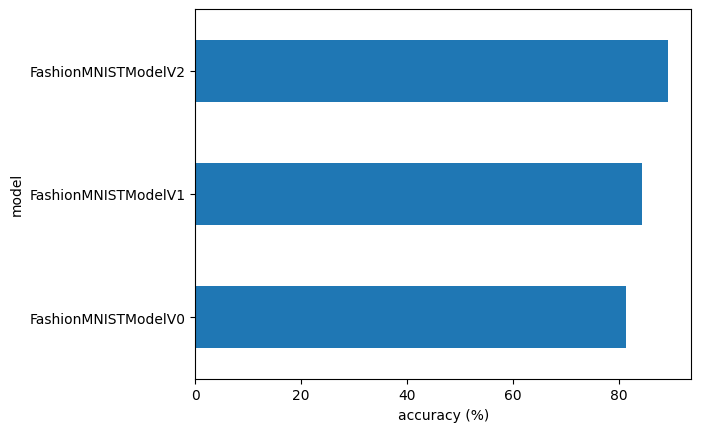

In [59]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")

## **12. Make and evaluate random predictions with best model**

### **12.1 Plot predictions**

In [60]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device=device):
  pred_probs = []

  model.eval()

  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # forward pass
      pred_logit = model(sample)

      # get prediction probability
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      # get pred_prob off gpu for further calculations
      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [61]:
import random
random.seed(40)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")


Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 8 (Bag)


In [62]:
# make predictions on test samples with model 2
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[:2]

tensor([[2.6624e-05, 5.3608e-07, 5.3826e-06, 7.5276e-08, 7.0587e-05, 4.8271e-06,
         3.1525e-04, 7.9362e-06, 9.9927e-01, 2.9632e-04],
        [9.9393e-01, 2.8482e-07, 7.9358e-04, 1.4416e-03, 8.7076e-06, 3.8668e-09,
         3.8017e-03, 1.5099e-06, 1.9678e-05, 9.9832e-08]])

In [63]:
pred_probs.shape

torch.Size([9, 10])

In [64]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels

(tensor([8, 0, 9, 8, 0, 4, 0, 5, 7]), [8, 0, 9, 8, 0, 4, 0, 5, 7])

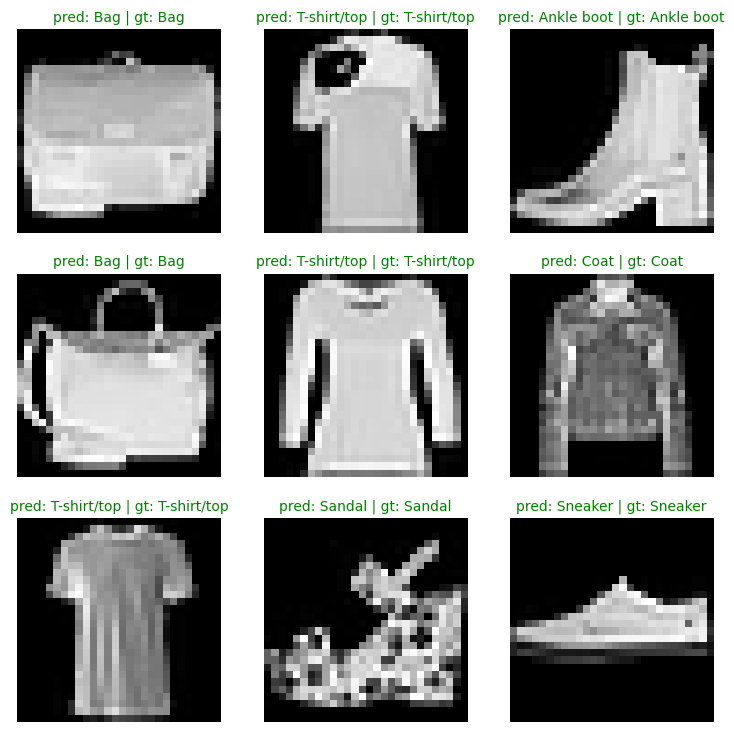

In [65]:
# plot predictions
plt.figure(figsize=(9,9))
rows = 3
columns = 3

for i, sample in enumerate(test_samples):
  # create subplot
  plt.subplot(rows, columns, i+1)

  # plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # find the prediction label (in text form)
  pred_label = class_names[pred_classes[i]]

  # find groundtruth label
  gt_label = class_names[test_labels[i]]

  title_text = f"pred: {pred_label} | gt: {gt_label}"

  # check for equality and change title colour accordingly
  if pred_label == gt_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")

  plt.axis(False)

### **12.2 Confusion Matrix**
* Make prediction using trained model on test data samples.
* Make confusion matrix using `torchmetrics.ConfusionMatrix`.
* for more info: https://lightning.ai/docs/torchmetrics/stable/classification/confusion_matrix.html

In [66]:
import mlxtend

In [67]:
mlxtend.__version__

'0.22.0'

In [68]:
from tqdm.auto import tqdm

# 1.make predictions
y_preds = []

model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    # forward pass
    y_logits = model_2(X)

    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())

# concatnate list of predictions into tensor

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 5])

In [69]:
try:
  import torchmetrics, mlxtend
  print(mlxtend.__version__)
  assert int(mlxtend.__version__.split(".")[1]>=19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(mlxtend.__version__)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 61.0 MB/s eta 0:00:00
0.22.0


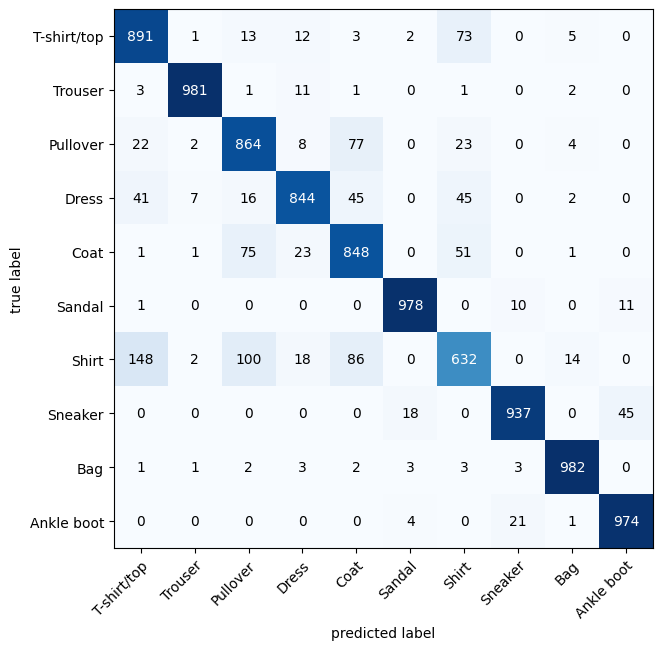

In [70]:
# plot confusion matrix
from torchmetrics import ConfusionMatrix

from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)


# plot confusion matrix
fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names=class_names,
                                figsize=(10,7))